In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,GRU

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define a list of stock symbols you want to download
symbols = ['META', 'AAPL', 'AMZN', 'NFLX','GOOGL']

# Define the date range for the data
start_date = '2000-07-31'
end_date = datetime.now().date()

# Create an empty DataFrame to store the concatenated data
all_data = pd.DataFrame()

# Loop through each symbol, download the data, and concatenate it
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol  # Add a column to identify the stock symbol
    all_data = pd.concat([all_data, data])

# Display the combined data
print(all_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2023-10-10  138.500000  139.720001  137.330002  138.059998  138

In [ ]:
data=all_data
data

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,META
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,META
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,META
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,META
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,META
...,...,...,...,...,...,...,...
2023-10-10,138.500000,139.720001,137.330002,138.059998,138.059998,27786600,GOOGL
2023-10-11,138.580002,141.110001,138.580002,140.550003,140.550003,25884300,GOOGL
2023-10-12,141.050003,141.220001,138.259995,138.970001,138.970001,24765500,GOOGL


In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24761 entries, 2012-05-18 to 2023-10-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       24761 non-null  float64
 1   High       24761 non-null  float64
 2   Low        24761 non-null  float64
 3   Close      24761 non-null  float64
 4   Adj Close  24761 non-null  float64
 5   Volume     24761 non-null  int64  
 6   Symbol     24761 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.5+ MB


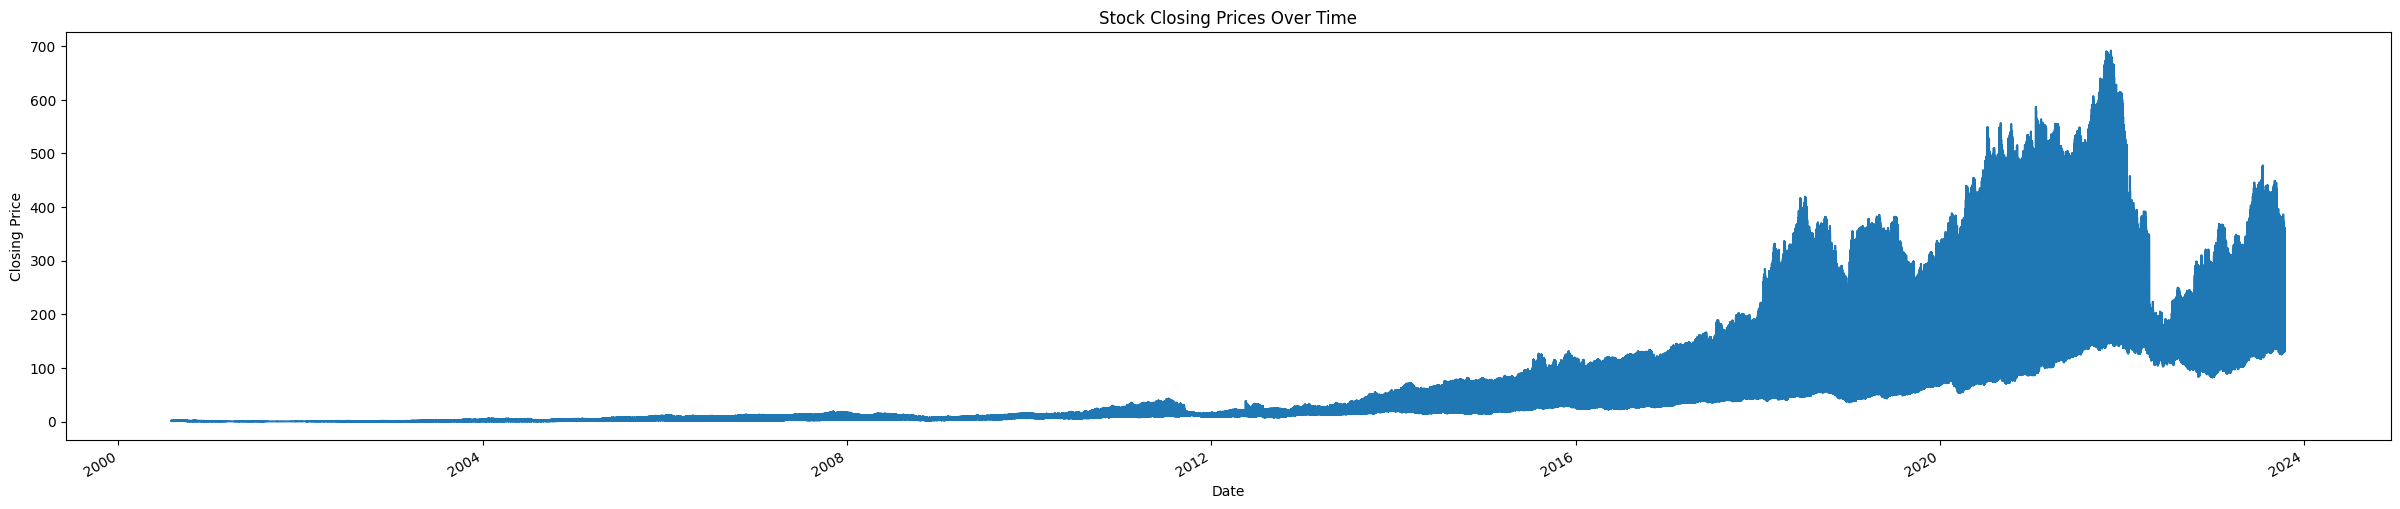

In [ ]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(30, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.show()

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data=scaler.fit_transform(data[['Close']])

In [ ]:
scaled_data

array([[0.05495032],
       [0.04887618],
       [0.04449412],
       ...,
       [0.20064295],
       [0.19831453],
       [0.20083097]])

In [ ]:
scaled_data.shape

(24761, 1)

In [ ]:
sequence_length = 10  # You can adjust this as needed

X = []
y = []

# Create sequences
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i : i + sequence_length])
    y.append(scaled_data[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [ ]:
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(scaled_data) * split_ratio)

X_train = scaled_data[:split_index - sequence_length]
y_train = scaled_data[sequence_length:split_index]

X_test = scaled_data[split_index - sequence_length:-sequence_length]
y_test = scaled_data[split_index:]



In [ ]:
from keras.layers import Dropout
from keras.regularizers import l2  # Import L2 regularization

model = Sequential()
model.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))  # Adding L2 regularization
model.add(GRU(32, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))  # Adding L2 regularization
model.add(Dropout(0.1))
model.add(Dense(1, bias_regularizer=l2(0.01)))  # Adding L2 regularization to the Dense layer

model.compile(loss='mean_squared_error', optimizer='adam')


history=model.fit(X_train, y_train, batch_size=8, epochs=10, validation_split=0.2)

Epoch 1/10
1980/1980 [==============================] - 22s 7ms/step - loss: 0.0292 - val_loss: 0.0012
Epoch 2/10
1980/1980 [==============================] - 13s 7ms/step - loss: 8.3531e-04 - val_loss: 0.0011
Epoch 3/10
1980/1980 [==============================] - 13s 7ms/step - loss: 7.8334e-04 - val_loss: 0.0011
Epoch 4/10
1980/1980 [==============================] - 14s 7ms/step - loss: 7.8428e-04 - val_loss: 0.0013
Epoch 5/10
1980/1980 [==============================] - 12s 6ms/step - loss: 7.6115e-04 - val_loss: 0.0031
Epoch 6/10
1980/1980 [==============================] - 13s 6ms/step - loss: 7.3708e-04 - val_loss: 0.0016
Epoch 7/10
1980/1980 [==============================] - 12s 6ms/step - loss: 7.9293e-04 - val_loss: 0.0020
Epoch 8/10
1980/1980 [==============================] - 12s 6ms/step - loss: 7.3297e-04 - val_loss: 0.0019
Epoch 9/10
1980/1980 [==============================] - 13s 6ms/step - loss: 7.4347e-04 - val_loss: 0.0015
Epoch 10/10
1980/1980 [==================

In [ ]:
model.save('GRU.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


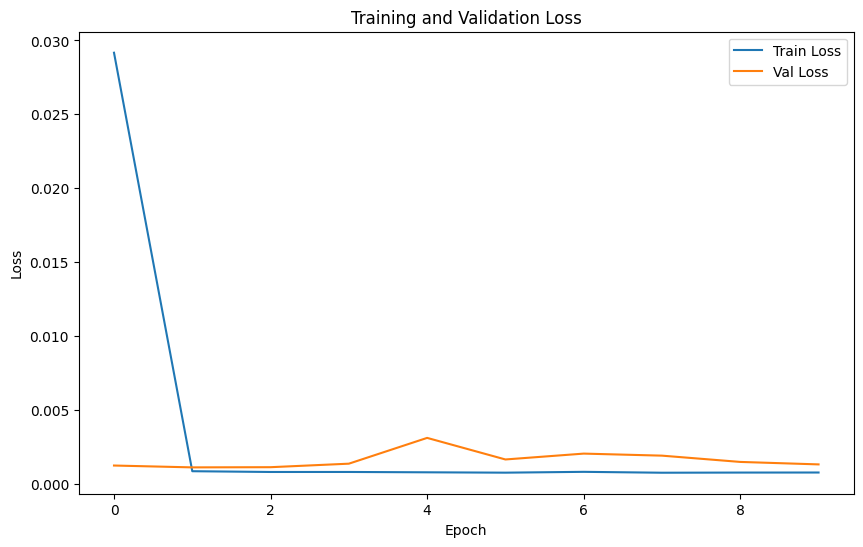

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions
predictions = model.predict(X_test).reshape(-1,1)

# Denormalize predictions
predictions = scaler.inverse_transform(predictions)
y_test_denorm = scaler.inverse_transform(y_test)



155/155 [==============================] - 1s 3ms/step - loss: 8.1390e-04
Test loss: 0.0008138986304402351
155/155 [==============================] - 1s 3ms/step


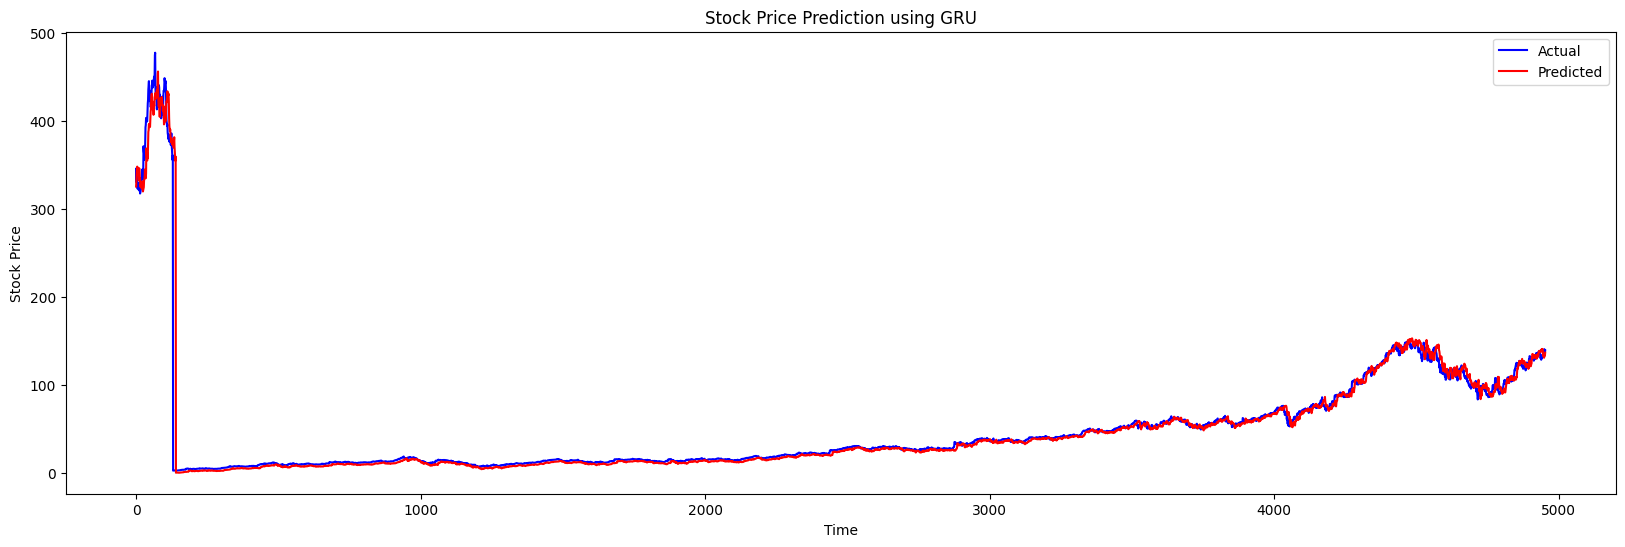

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_denorm, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Stock Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Define the sequence length
sequence_length = 10

# Assuming you have a trained LSTM model named 'model' and a scaler named 'scaler'

# Take the last sequence_length data points from the test set
last_sequence = X_test[-sequence_length:]

# Create a list to store the predicted values
predicted_values = []

# Predict the next 10 days iteratively
for _ in range(10):
    # Reshape the last_sequence to match the input shape of the model
    last_sequence_reshaped = last_sequence.reshape(-1,1)

    # Predict the next value
    next_prediction = model.predict(last_sequence_reshaped)

    # Append the predicted value to the list
    predicted_values.append(next_prediction[0, 0])

    # Update the last_sequence for the next iteration
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_prediction[0, 0]  # Update the last element

# Denormalize the predicted values
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Print the predicted values for the next 10 days
print("Predicted values for the next 10 days:")
print(predicted_values)


1/1 [==============================] - 0s 19ms/step
Predicted values for the next 10 days:
[[140.68764]
 [136.21573]
 [132.78168]
 [132.5839 ]
 [133.47905]
 [130.83496]
 [132.88577]
 [134.72784]
 [133.21884]
 [136.66307]]


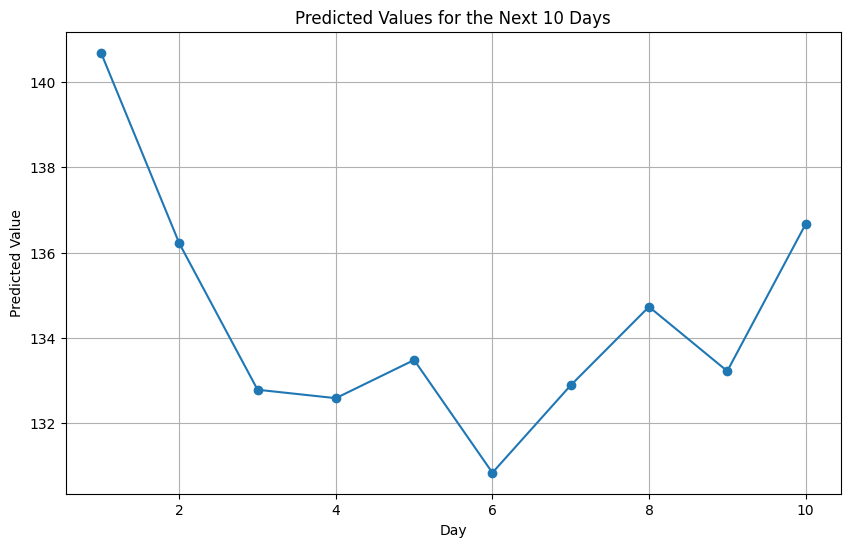

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predicted_values' contains your predicted values

# Create an array of days for the next 10 days
next_10_days = np.arange(1, 11)

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(next_10_days, predicted_values, marker='o', linestyle='-')
plt.title("Predicted Values for the Next 10 Days")
plt.xlabel("Day")
plt.ylabel("Predicted Value")
plt.grid(True)
plt.show()
